https://github.com/openai/openai-cookbook/blob/main/examples/Clustering.ipynb

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('../src/tmp/embedding/conversation-embeddings.csv')

# Convert to a list of strings of floats
df.embedding = df.embedding.apply(eval).apply(np.array)

In [6]:
from sklearn.cluster import KMeans

matrix = np.vstack(df.embedding)
n_clusters = 20

kmeans = KMeans(
	n_clusters = n_clusters, 
	init='k-means++',
	n_init=10,
	random_state=42
)
kmeans.fit(matrix)
df['cluster'] = kmeans.labels_

Text(0.5, 1.0, 'Transcription K-means clusters in 2D using t-SNE')

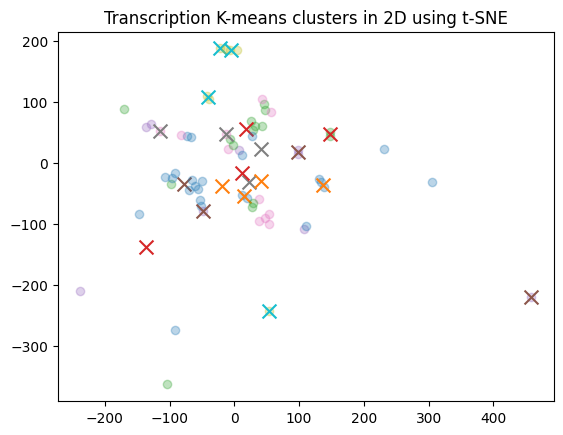

In [7]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(
	n_components=2, 
	perplexity=1, 
	random_state=42, 
	learning_rate="auto"
)
vis_dims2 = tsne.fit_transform(
	X=matrix
)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for cluster in range(n_clusters):
    xs = np.array(x)[df.cluster == cluster]
    ys = np.array(y)[df.cluster == cluster]
    plt.scatter(xs, ys, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", s=100)
plt.title("Transcription K-means clusters in 2D using t-SNE")

In [8]:
videos_by_cluster = df.groupby('cluster')['name'].agg(list).reset_index()
videos_by_cluster['count'] = videos_by_cluster['name'].apply(len)
videos_by_cluster = videos_by_cluster.sort_values(
    by=['count'], 
		ascending=False
)
videos_by_cluster

,cluster,name,count
5,5,"[bbc_news-5, cnn-10, cnn-12, cnn-5, cnn-7, cnn...",18
1,1,"[bbc_news-0, bbc_news-4, cnn-11, dw_news-0, dw...",7
8,8,"[cnn-0, cnn-1, cnn-2, cnn-6, cnn-9, dw_news-3,...",7
2,2,"[bbc_news-3, cnn-3, dw_news-7, guardian_news-0...",5
11,11,"[bbc_news-2, dw_news-2, insider_news-2, todayo...",4
19,19,"[the_hot_box-3, the_hot_box-5, todayonline-5]",3
16,16,"[nbc_news-2, the_hot_box-9]",2
15,15,"[the_hot_box-14, the_hot_box-15]",2
12,12,"[bbc_news-1, insider_news-3]",2
0,0,"[todayonline-2, todayonline-3]",2


In [34]:
videos_by_cluster['name'].iloc[4]

['bbc_news-2', 'dw_news-2', 'insider_news-2', 'todayonline-0']